# Cleaning Modes With Rational Filters

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
from gwpy.timeseries import TimeSeries
import copy
import glob

In [3]:
SSB_peak_time = 1126259461.9987423
theoretical_values = (68.6, 0.71)
mass_unit = qnm_filter.Filter.mass_unit(68.6)

Recall that 220, 220+221, 220+221+210 do not have time in mass units and do not have the values as errors

In [4]:
def epsilon_calc(mass_err, chi_err, mass_theoretical, chi_theoretical):
    temp0 = chi_err**2
    temp1 = (mass_err/mass_theoretical)**2
    return np.sqrt(temp0+temp1)

In [25]:
def loader_unprocessed(file_name):
    data = np.loadtxt(file_name)
    name = file_name.split('combined_')[-1].split('.txt')[0]
    time[name] = (data[:,0] - SSB_peak_time)/mass_unit
    evidence[name] = data[:,1]
    avg_m_err[name] = data[:,2] - theoretical_values[0]
    avg_chi_err[name] = data[:,3] - theoretical_values[1]
    MAP_m_err[name] = data[:,4] - theoretical_values[0]
    MAP_chi_err[name] = data[:,5] - theoretical_values[1]
    avg_epsilon[name] = epsilon_calc(data[:,2] - theoretical_values[0], data[:,3] - theoretical_values[1], theoretical_values[0], theoretical_values[1])
    MAP_epsilon[name] = epsilon_calc(data[:,4] - theoretical_values[0], data[:,5] - theoretical_values[1], theoretical_values[0], theoretical_values[1])
    
def loader_processed(file_name):
    data = np.loadtxt(file_name)
    name = file_name.split('combined_')[-1].split('.txt')[0]
    time[name] = data[:,0]
    evidence[name] = data[:,1]
    avg_m_err[name] = data[:,2]
    avg_chi_err[name] = data[:,3]
    MAP_m_err[name] = data[:,4]
    MAP_chi_err[name] = data[:,5]
    avg_epsilon[name] = epsilon_calc(data[:,2], data[:,3], theoretical_values[0], theoretical_values[1])
    MAP_epsilon[name] = epsilon_calc(data[:,4], data[:,5], theoretical_values[0], theoretical_values[1])

In [26]:
file_dir = "./Cluster_results/*"
file_list0 = ['./Cluster_results/combined_220.txt', './Cluster_results/combined_220+221.txt', \
            './Cluster_results/combined_220+221+210.txt', './Cluster_results/combined_220+440.txt']
file_list1 = [f for f in glob.glob(file_dir)]
for f in file_list0:
    file_list1.remove(f)

In [27]:
time = {}
evidence = {}
avg_m_err = {} 
avg_chi_err = {}
MAP_m_err = {} 
MAP_chi_err = {}
avg_epsilon = {}
MAP_epsilon = {}

[loader_unprocessed(f) for f in file_list0]
[loader_processed(f) for f in file_list1]

[None, None, None, None]

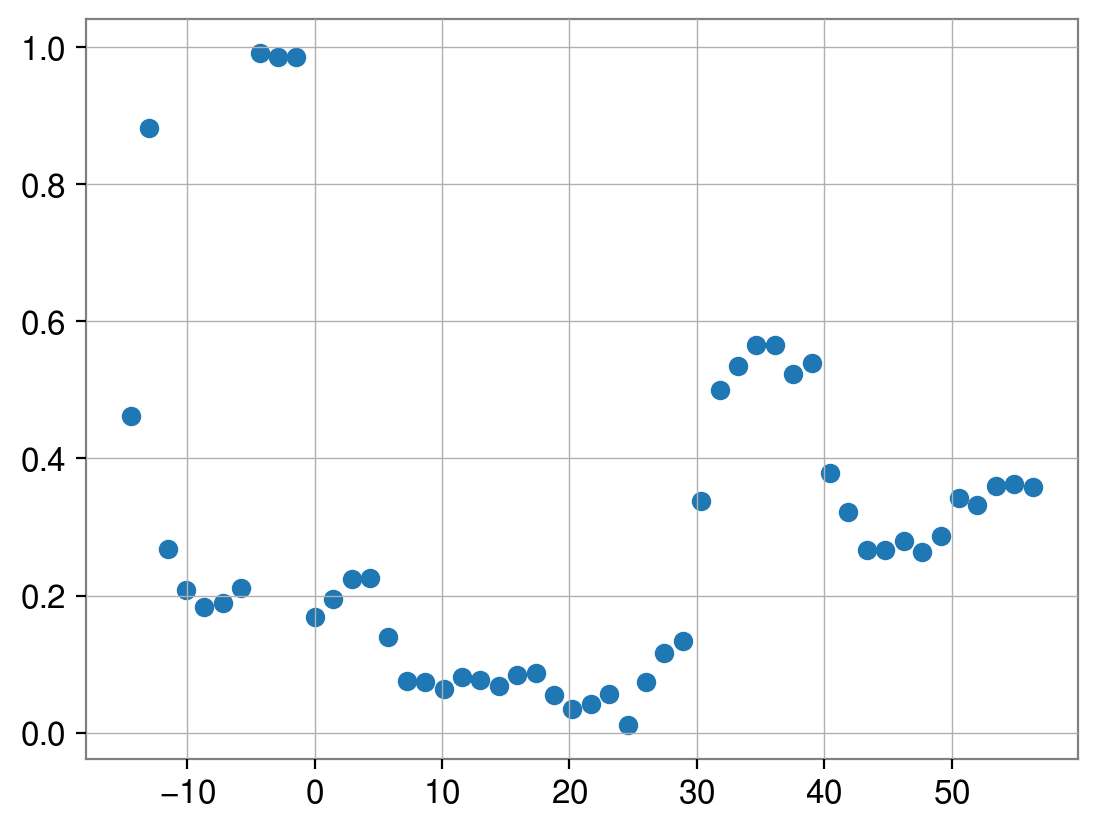

In [32]:
# pl.plot(time['220'], avg_m_err['220'])
# pl.plot(time['220'], MAP_m_err['220'])
pl.plot(time['220+221+440'], avg_epsilon['220+221+440'], 'o')

In [14]:
avg_epsilon['220+221+440'][-20] - MAP_epsilon['220+221+440'][-19]

-0.1723676466288575

In [15]:
time['220+221+440'][-20]*mass_unit == (40-20)/2048

True

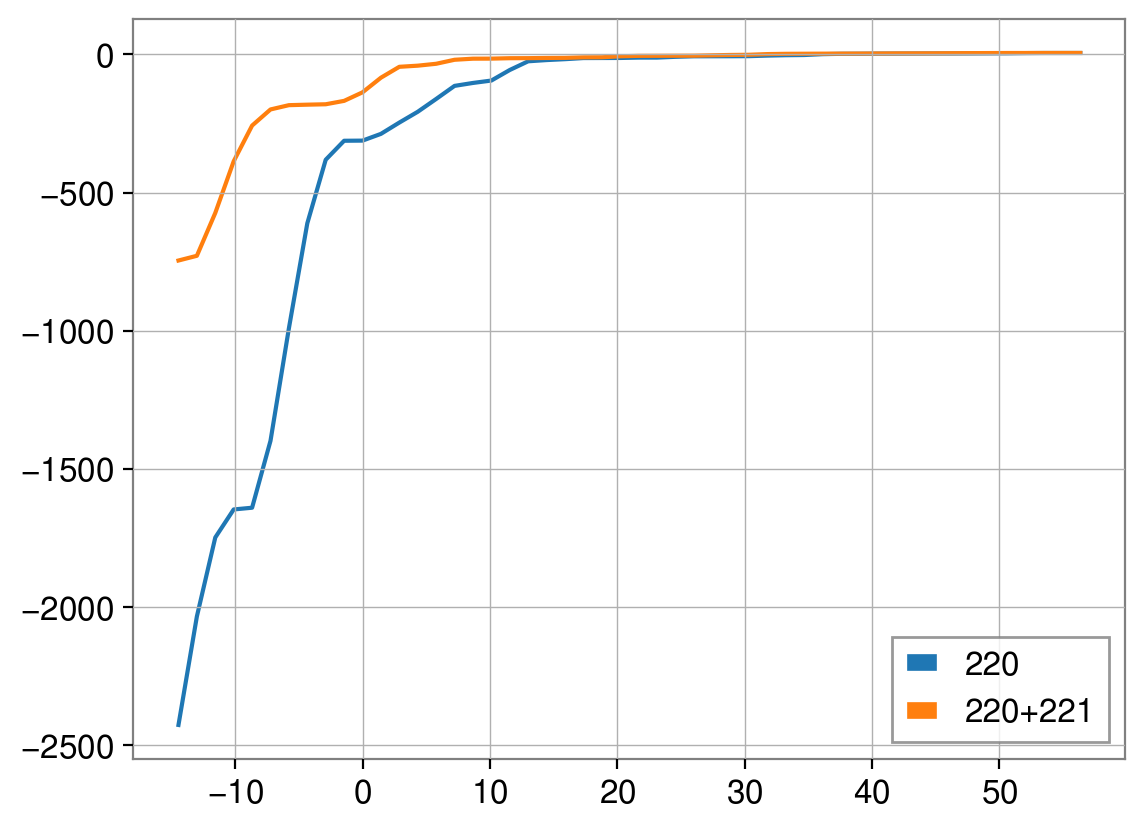

In [33]:
keys = ['220', '220+221']

for k in keys:
    pl.plot(time[k], evidence[k], label = k)
pl.legend()

(-10.0, 250.0)

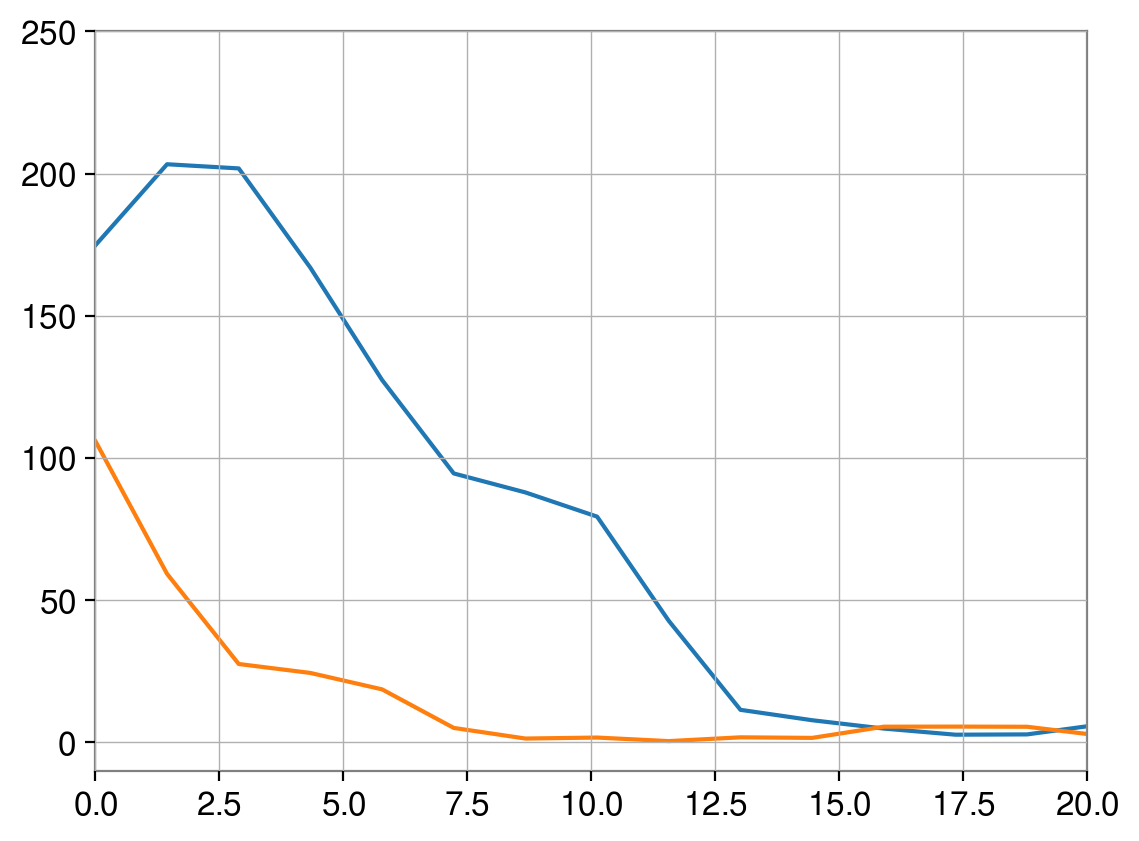

In [43]:
pl.plot(time['220'], evidence['220+221'] - evidence['220'])
pl.plot(time['220'], evidence['220+221+222'] - evidence['220+221'])
pl.xlim(0, 20)
pl.ylim(-10, 250)

In [44]:
import qnm
np.imag(qnm.modes_cache(s=-2, l=2, m=2, n=2)(a=0.71)[0])

-0.4100269497825199

KeyError: '220+221+210'

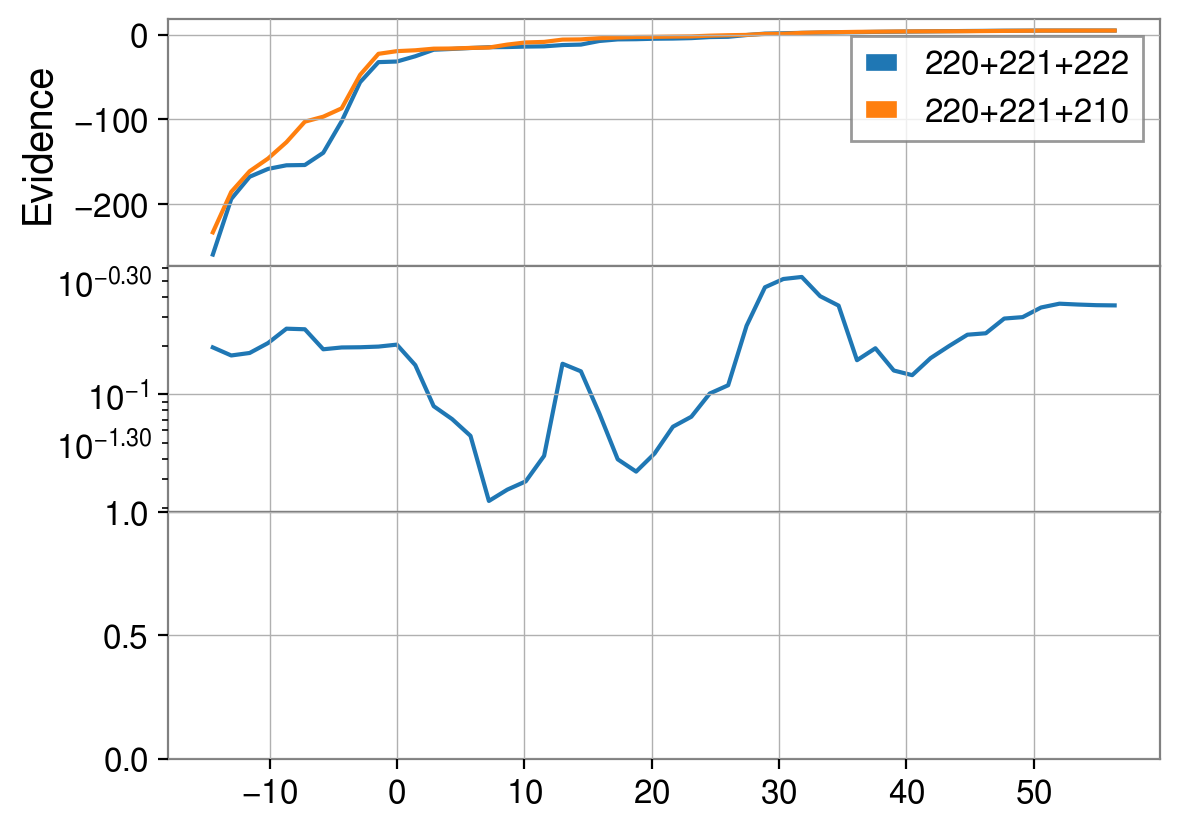

In [17]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time['220+221+222'], evidence['220+221+222'], label = "220+221+222")
axs[0].plot(time['220+221+210'], evidence['220+221+210'], label = "220+221+210")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time['220+221+222'], avg_epsilon['220+221+222'])
axs[1].semilogy(time['220+221+210'], avg_epsilon['220+221+210'])
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221, MAP_epsilon220_221)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

Text(0, 0.5, 'MAP $\\epsilon$')

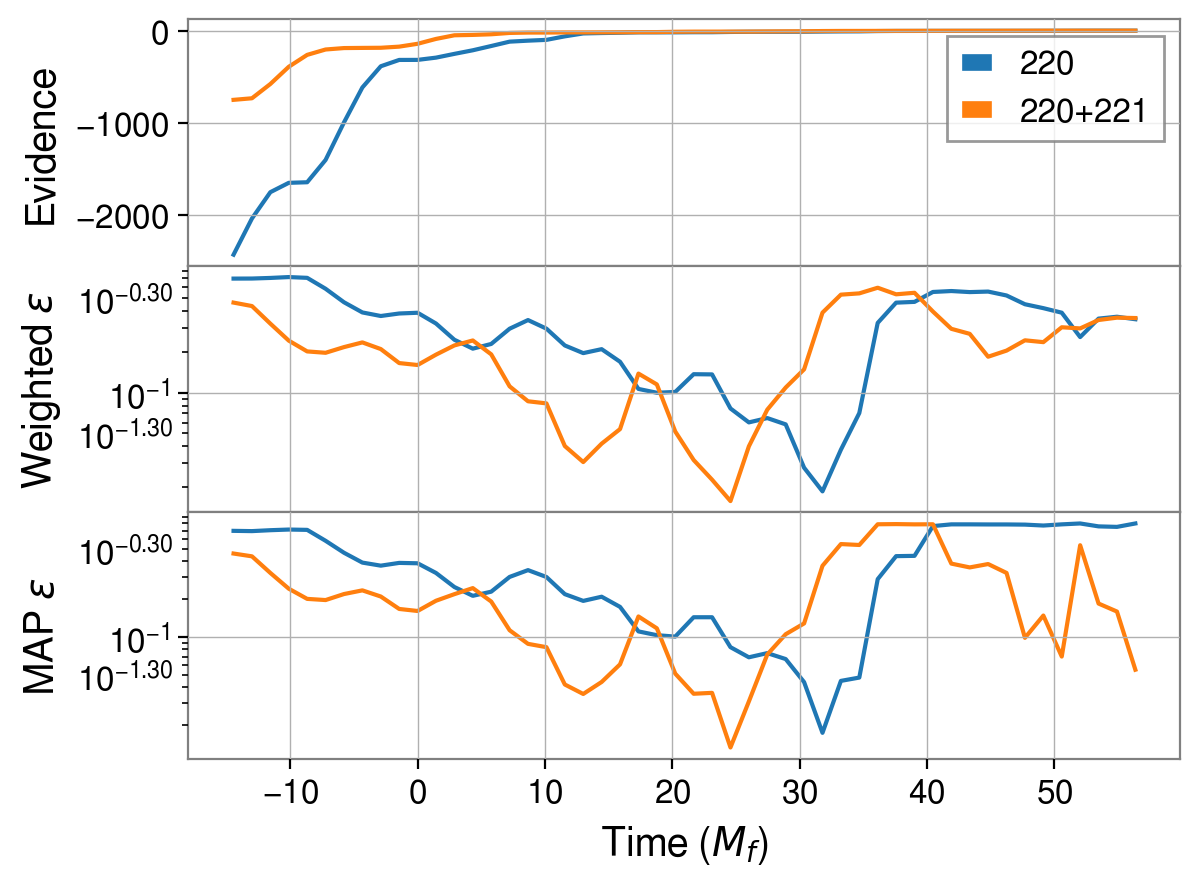

In [27]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221, evidence220_221, label = "220+221")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221, average_epsilon220_221)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221, MAP_epsilon220_221)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

Text(0, 0.5, 'MAP $\\epsilon$')

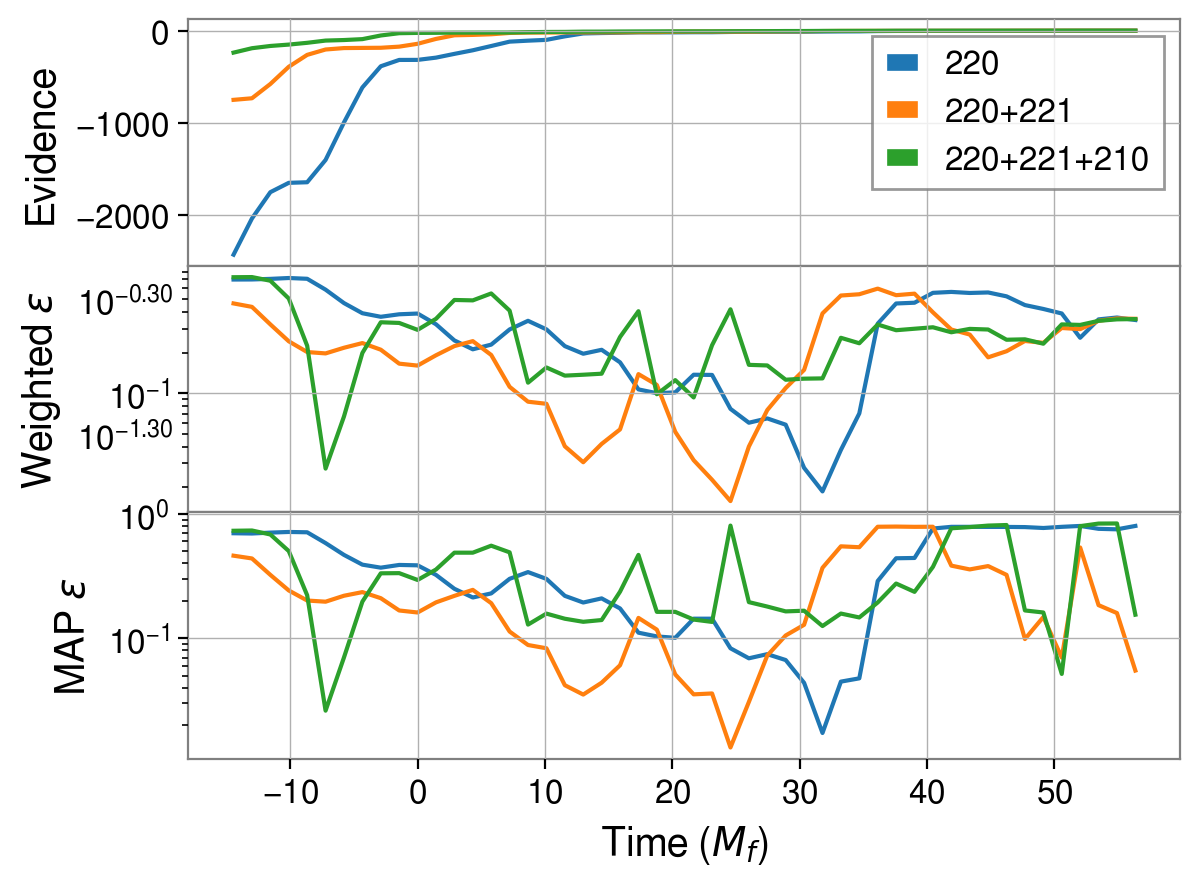

In [30]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221, evidence220_221, label = "220+221")
axs[0].plot(time220_221_210, evidence220_221_210, label = "220+221+210")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221, average_epsilon220_221)
axs[1].semilogy(time220_221_210, average_epsilon220_221_210)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221, MAP_epsilon220_221)
axs[2].semilogy(time220_221_210, MAP_epsilon220_221_210)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

Text(0, 0.5, 'MAP $\\epsilon$')

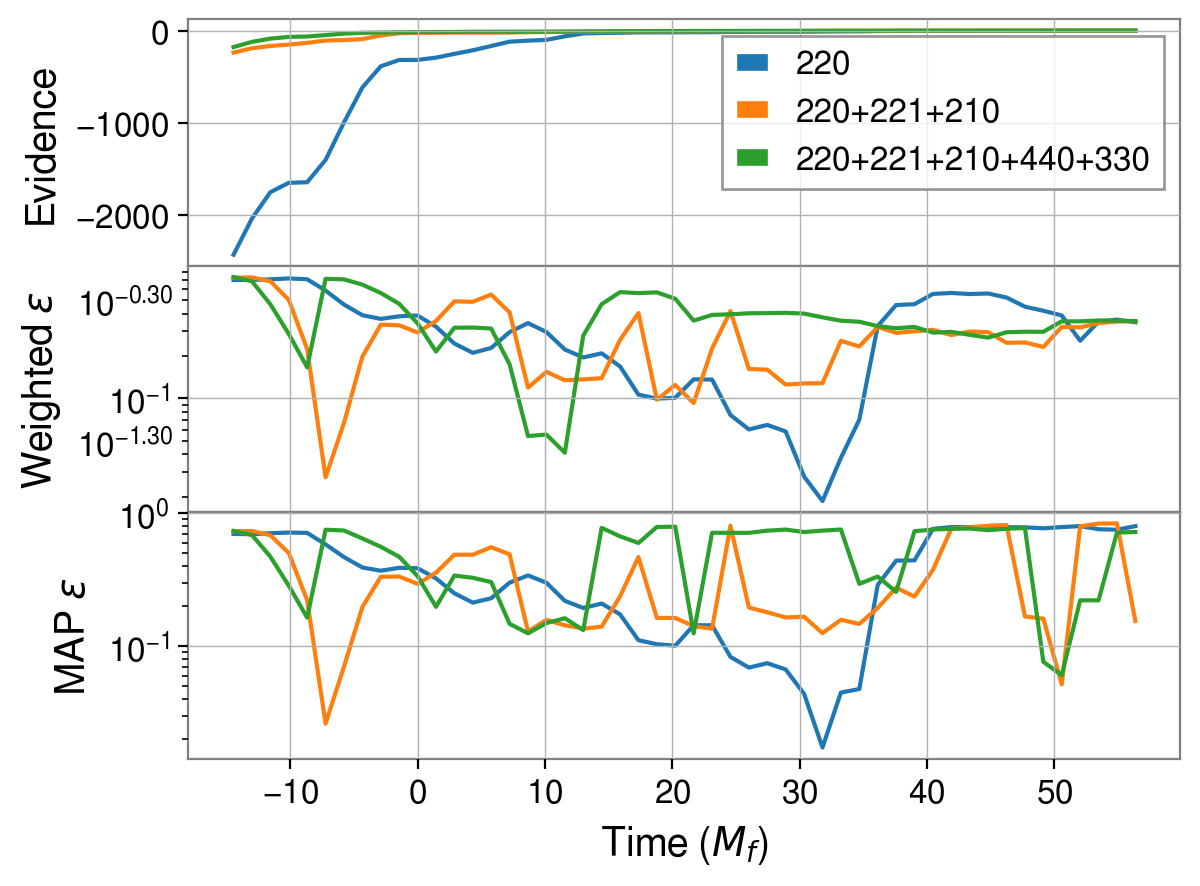

In [41]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221_210, evidence220_221_210, label = "220+221+210")
axs[0].plot(time220_221_210, evidence220_221_210_440_330, label = "220+221+210+440+330")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221_210, average_epsilon220_221_210)
axs[1].semilogy(time220_221_210_440_330, average_epsilon220_221_210_440_330)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221_210, MAP_epsilon220_221_210)
axs[2].semilogy(time220_221_210_440_330, MAP_epsilon220_221_210_440_330)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

## Plot

In [42]:
diff = (evidence220_221_440 - evidence220_221_330)>0
intersect = np.array([i[0] != i[1] for i in zip(diff, np.append(diff[1:], [False]))])

In [43]:
t_intersect = time220_221_440[intersect][0:2]

Text(0, 0.5, 'MAP $\\epsilon$')

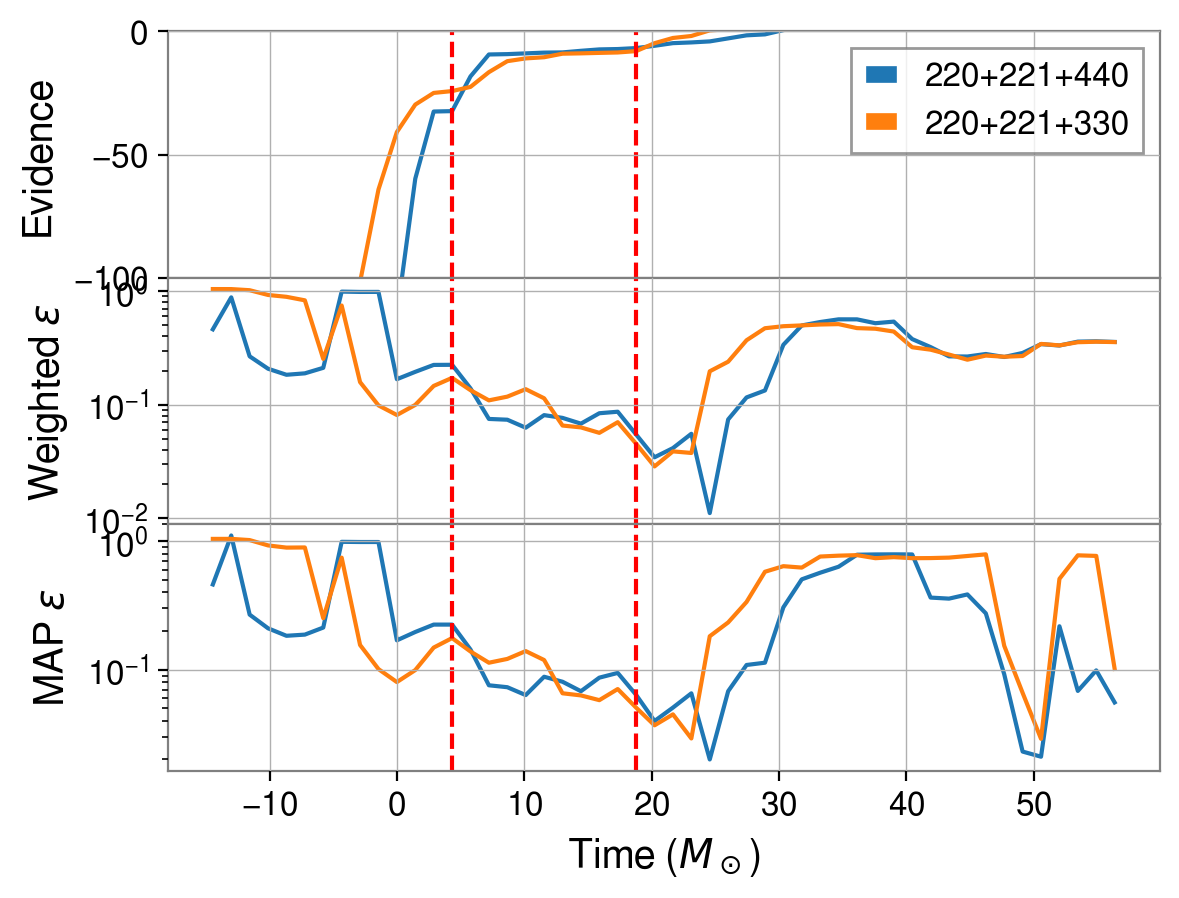

In [44]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220_221_440, evidence220_221_440, label = "220+221+440")
axs[0].plot(time220_221_330, evidence220_221_330, label = "220+221+330")
axs[0].set_ylabel("Evidence")
axs[0].legend()
axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
axs[0].set_ylim(-100, 0)
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220_221_440, average_epsilon220_221_440)
axs[1].semilogy(time220_221_330, average_epsilon220_221_330)
axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220_221_440, MAP_epsilon220_221_440)
axs[2].semilogy(time220_221_330, MAP_epsilon220_221_330)
axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_\odot$)')
axs[2].set_ylabel(r'MAP $\epsilon$')